In [1]:
#%load_ext Cython
from __future__ import division
import time
import multiprocessing
import pandas as pd
from sklearn import preprocessing as s
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def find_required_data(array,min_value,max_value,index_var):
       for index, row in array.iterrows():
        if row[index_var]>=min_value and row[index_var]<=max_value:
            print (index,row[index_var])

In [3]:
def plot_confusion_matrix(y_true, y_pred, title = 'Confusion matrix', cmap=plt.cm.Blues):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print 'Classification Report:\n'
    print classification_report(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    def plot_confusion_matrix_plot(cm, title = 'Confusion matrix', cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(y_test.unique()))
        plt.xticks(tick_marks, rotation=45)
        plt.yticks(tick_marks)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
    print '\n Confusion matrix, without normalization: \n'
    print cm
    plot_confusion_matrix_plot(cm=cm)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('\n Normalized confusion matrix \n')
    print(cm_normalized)
    plt.figure()
    plot_confusion_matrix_plot(cm_normalized, title='Normalized confusion matrix')

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-3-94d8f95facdf>, line 4)

# АЛГОРИТМ ДЛЯ УЗОРНЫХ СТРУКТУР

Читаем из файла. Заменяем пропуски на средние(возможна корректировка)

In [6]:
my_dataframe=pd.read_csv('cs-training.csv')
my_dataframe=my_dataframe.iloc[:,1:]
my_dataframe.fillna(my_dataframe.mean(),inplace=True)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.000000
1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.000000
2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.000000
3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.000000
4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.000000
5,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.000000
6,0,0.305682,57,0,5710.000000,6670.221237,8,0,3,0,0.000000
7,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.000000
8,0,0.116951,27,0,46.000000,6670.221237,2,0,0,0,0.757222
9,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.000000


# WOE трансформация

Transformation with manual woe
     labels       woe
0     d_nan -0.036758
10  d_0_d_1 -1.000000
20        1  0.200495
21        2  1.000000
22        6 -0.460236
26        3  0.032409
27        4 -0.107792
44        5 -0.291470
64        0  0.280999
       mean        bad   obs       good       woe      bins labels
0  0.221657   6.649700  30.0  23.350300  0.280999      -inf      0
1  0.226045   6.781343  30.0  23.218657  0.255742 -0.393731      1
2  0.245668   7.370030  30.0  22.629970  0.146815 -0.242627      2
3  0.241105   7.233157  30.0  22.766843  0.171591 -0.100627      3
1  0.238997   4.779930  20.0  15.220070  0.183150  0.000000    d_0
4  0.267480   8.024391  30.0  21.975609  0.032409  0.004095      4
5  0.295828   8.874826  30.0  21.125174 -0.107792  0.122563      5
6  0.335465  10.063959  30.0  19.936041 -0.291470  0.271922      6
7  0.374068  11.222048  30.0  18.777952 -0.460236  0.382677      7
2  0.276943   5.538863  20.0  14.461137 -0.015363  1.000000    d_1
0  0.281248 

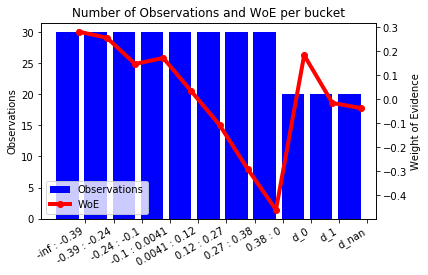

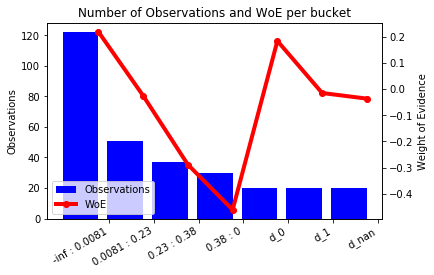

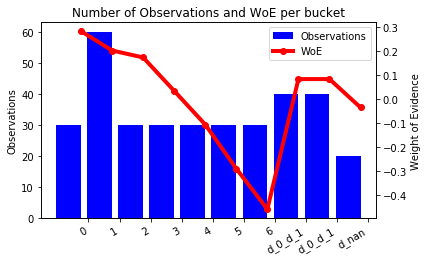

In [7]:
# %load woe.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score

__author__ = 'Denis Surzhko'


# ver 0.1.5.1
# transform: manual woe replacement added
# bug fix: min_leaf optimization fixed
class WoE:
    """
    Basic functionality for WoE bucketing of continuous and discrete variables
    :param self.bins: DataFrame WoE transformed variable and all related statistics
    :param self.iv: Information Value of the transformed variable
    """

    def __init__(self, qnt_num=16, min_block_size=16, spec_values=None, v_type='c', bins=None, t_type='b'):
        """
        :param qnt_num: Number of buckets (quartiles) for continuous variable split
        :param min_block_size: minimum number of observation in each bucket (continuous variables), incl. optimization restrictions
        :param spec_values: List or Dictionary {'label': value} of special values (frequent items etc.)
        :param v_type: 'c' for continuous variable, 'd' - for discrete
        :param bins: Predefined bucket borders for continuous variable split
        :t_type : Binary 'b' or continous 'c' target variable
        :return: initialized class
        """
        self.__qnt_num = qnt_num  # Num of buckets/quartiles
        self._predefined_bins = None if bins is None else np.array(bins)  # user bins for continuous variables
        self.type = v_type  # if 'c' variable should be continuous, if 'd' - discrete
        self._min_block_size = min_block_size  # Min num of observation in bucket
        self._gb_ratio = None  # Ratio of good and bad in the sample
        self.bins = None  # WoE Buckets (bins) and related statistics
        self.df = None  # Training sample DataFrame with initial data and assigned woe
        self.qnt_num = None  # Number of quartiles used for continuous part of variable binning
        self.t_type = t_type  # Type of target variable
        if type(spec_values) == dict:  # Parsing special values to dict for cont variables
            self.spec_values = {}
            for k, v in spec_values.items():
                if v.startswith('d_'):
                    self.spec_values[k] = v
                else:
                    self.spec_values[k] = 'd_' + v
        else:
            if spec_values is None:
                self.spec_values = {}
            else:
                self.spec_values = {i: 'd_' + str(i) for i in spec_values}

    def fit(self, x, y):
        """
        Fit WoE transformation
        :param x: continuous or discrete predictor
        :param y: binary target variable
        :return: WoE class
        """
        # Data quality checks
        if not isinstance(x, pd.Series):
            x = pd.Series(x)
        if not isinstance(y, pd.Series):
            y = pd.Series(y)
        if not x.size == y.size:
            raise Exception("Y size don't match Y size")
        # Calc total good bad ratio in the sample
        t_bad = np.sum(y)
        if t_bad == 0 or t_bad == y.size:
            raise ValueError("There should be BAD and GOOD observations in the sample")
        if np.max(y) > 1 or np.min(y) < 0:
            raise ValueError("Y range should be between 0 and 1")
        # setting discrete values as special values
        if self.type == 'd':
            sp_values = {i: 'd_' + str(i) for i in x.unique()}
            if len(sp_values) > 100:
                raise type("DiscreteVarOverFlowError", (Exception,),
                           {"args": ('Discrete variable with too many unique values (more than 100)',)})
            else:
                if self.spec_values:
                    sp_values.update(self.spec_values)
                self.spec_values = sp_values
        # Make data frame for calculations
        df = pd.DataFrame({"X": x, "Y": y, 'order': np.arange(x.size)})
        # Separating NaN and Special values
        df_sp_values, df_cont = self._split_sample(df)
        # # labeling data
        df_cont, c_bins = self._cont_labels(df_cont)
        df_sp_values, d_bins = self._disc_labels(df_sp_values)
        # getting continuous and discrete values together
        self.df = df_sp_values.append(df_cont)
        self.bins = d_bins.append(c_bins)
        # calculating woe and other statistics
        self._calc_stat()
        # sorting appropriately for further cutting in transform method
        self.bins.sort_values('bins', inplace=True)
        # returning to original observation order
        self.df.sort_values('order', inplace=True)
        self.df.set_index(x.index, inplace=True)
        return self

    def fit_transform(self, x, y):
        """
        Fit WoE transformation
        :param x: continuous or discrete predictor
        :param y: binary target variable
        :return: WoE transformed variable
        """
        self.fit(x, y)
        return self.df['woe']

    def _split_sample(self, df):
        if self.type == 'd':
            return df, None
        sp_values_flag = df['X'].isin(self.spec_values.keys()).values | df['X'].isnull().values
        df_sp_values = df[sp_values_flag].copy()
        df_cont = df[np.logical_not(sp_values_flag)].copy()
        return df_sp_values, df_cont

    def _disc_labels(self, df):
        df['labels'] = df['X'].apply(
            lambda x: self.spec_values[x] if x in self.spec_values.keys() else 'd_' + str(x))
        d_bins = pd.DataFrame({"bins": df['X'].unique()})
        d_bins['labels'] = d_bins['bins'].apply(
            lambda x: self.spec_values[x] if x in self.spec_values.keys() else 'd_' + str(x))
        return df, d_bins

    def _cont_labels(self, df):
        # check whether there is a continuous part
        if df is None:
            return None, None
        # Max buckets num calc
        self.qnt_num = int(np.minimum(df['X'].unique().size / self._min_block_size, self.__qnt_num)) + 1
        # cuts - label num for each observation, bins - quartile thresholds
        bins = None
        cuts = None
        if self._predefined_bins is None:
            try:
                cuts, bins = pd.qcut(df["X"], self.qnt_num, retbins=True, labels=False)
            except ValueError as ex:
                if ex.args[0].startswith('Bin edges must be unique'):
                    ex.args = ('Please reduce number of bins or encode frequent items as special values',) + ex.args
                    raise
            bins = np.append((-float("inf"),), bins[1:-1])
        else:
            bins = self._predefined_bins
            if bins[0] != float("-Inf"):
                bins = np.append((-float("inf"),), bins)
            cuts = pd.cut(df['X'], bins=np.append(bins, (float("inf"),)),
                          labels=np.arange(len(bins)).astype(str))
        df["labels"] = cuts.astype(str)
        c_bins = pd.DataFrame({"bins": bins, "labels": np.arange(len(bins)).astype(str)})
        return df, c_bins

    def _calc_stat(self):
        # calculating WoE
        col_names = {'count_nonzero': 'bad', 'size': 'obs'}
        stat = self.df.groupby("labels")['Y'].agg([np.mean, np.count_nonzero, np.size]).rename(columns=col_names).copy()
        if self.t_type != 'b':
            stat['bad'] = stat['mean'] * stat['obs']
        stat['good'] = stat['obs'] - stat['bad']
        t_good = np.maximum(stat['good'].sum(), 0.5)
        t_bad = np.maximum(stat['bad'].sum(), 0.5)
        stat['woe'] = stat.apply(self._bucket_woe, axis=1) + np.log(t_bad / t_good)
        iv_stat = (stat['good'] / t_good - stat['bad'] / t_bad) * stat['woe']
        self.iv = iv_stat.sum()
        # adding stat data to bins
        self.bins = pd.merge(stat, self.bins, left_index=True, right_on=['labels'])
        label_woe = self.bins[['woe', 'labels']].drop_duplicates()
        self.df = pd.merge(self.df, label_woe, left_on=['labels'], right_on=['labels'])

    def transform(self, x, manual_woe=None):
        """
        Transforms input variable according to previously fitted rule
        :param x: input variable
        :param manual_woe: one can change fitted woe with manual values by providing dict {label: new_woe_value}
        :return: DataFrame with transformed with original and transformed variables
        """
        if not isinstance(x, pd.Series):
            raise TypeError("pandas.Series type expected")
        if self.bins is None:
            raise Exception('Fit the model first, please')
        df = pd.DataFrame({"X": x, 'order': np.arange(x.size)})
        # splitting to discrete and continous pars
        df_sp_values, df_cont = self._split_sample(df)
        # Replacing original with manual woe
        if manual_woe:
            tr_bins = self.bins[['woe', 'labels']].copy()
            if not type(manual_woe) == dict:
                TypeError("manual_woe should be dict")
            else:
                for key in manual_woe:
                    tr_bins['woe'].mask(tr_bins['labels'] == key, manual_woe[key], inplace=True)
        else:
            tr_bins = self.bins
            # function checks existence of special values, raises error if sp do not exist in training set

        def get_sp_label(x_):
            if x_ in self.spec_values.keys():
                return self.spec_values[x_]
            else:
                str_x = 'd_' + str(x_)
                if str_x in list(self.bins['labels']):
                    return str_x
                else:
                    raise ValueError('Value {} does not exist in the training set'.format(str_x))

        # assigning labels to discrete part
        df_sp_values['labels'] = df_sp_values['X'].apply(get_sp_label)
        # assigning labels to continuous part
        c_bins = self.bins[self.bins['labels'].apply(lambda z: not z.startswith('d_'))]
        if not self.type == 'd':
            cuts = pd.cut(df_cont['X'], bins=np.append(c_bins["bins"], (float("inf"),)), labels=c_bins["labels"])
            df_cont['labels'] = cuts.astype(str)
        # Joining continuous and discrete parts
        df = df_sp_values.append(df_cont)
        # assigning woe
        df = pd.merge(df, tr_bins[['woe', 'labels']].drop_duplicates(), left_on=['labels'], right_on=['labels'])
        # returning to original observation order
        df.sort_values('order', inplace=True)
        return df.set_index(x.index)

    def merge(self, label1, label2=None):
        """
        Merge of buckets with given labels
        In case of discrete variable, both labels should be provided. As the result labels will be marget to one bucket.
        In case of continous variable, only label1 should be provided. It will be merged with the next label.
        :param label1: first label to merge
        :param label2: second label to merge
        :return:
        """
        spec_values = self.spec_values.copy()
        c_bins = self.bins[self.bins['labels'].apply(lambda x: not x.startswith('d_'))].copy()
        if label2 is None and not label1.startswith('d_'):  # removing bucket for continuous variable
            c_bins = c_bins[c_bins['labels'] != label1]
        else:
            if not (label1.startswith('d_') and label2.startswith('d_')):
                raise Exception('Labels should be discrete simultaneously')
            for i in self.bins[self.bins['labels'] == label1]['bins']:
                spec_values[i] = label1 + '_' + label2
            bin2 = self.bins[self.bins['labels'] == label2]['bins'].iloc[0]
            spec_values[bin2] = label1 + '_' + label2
        new_woe = WoE(self.__qnt_num, self._min_block_size, spec_values, self.type, c_bins['bins'], self.t_type)
        return new_woe.fit(self.df['X'], self.df['Y'])

    def plot(self, sort_values=True, labels=False):
        """
        Plot WoE transformation and default rates
        :param sort_values: whether to sort discrete variables by woe, continuous by labels
        :param labels: plot labels or intervals for continuous buckets
        :return: plotting object
        """
        bar_width = 0.8
        woe_fig = plt.figure()
        plt.title('Number of Observations and WoE per bucket')
        ax = woe_fig.add_subplot(111)
        ax.set_ylabel('Observations')
        plot_data = self.bins[['labels', 'woe', 'obs', 'bins']].copy().drop_duplicates()
        if sort_values:
            if self.type == 'd':
                plot_data.sort_values('woe', inplace=True)
            else:
                cont_labels = plot_data['labels'].apply(lambda z: not z.startswith('d_'))
                temp_data = plot_data[cont_labels].sort_values('bins')
                plot_data = temp_data.append(plot_data[~cont_labels].sort_values('labels'))
        # creating plot labels
        plot_data['plot_bins'] = plot_data['bins'].apply(lambda x: '{:0.2g}'.format(x))
        right_bound = plot_data['plot_bins'].iloc[1:].append(pd.Series(['Inf']))
        plot_data['plot_bins'] = plot_data['plot_bins'].add(' : ')
        plot_data['plot_bins'] = plot_data['plot_bins'].add(list(right_bound))
        cont_labels = plot_data['labels'].apply(lambda z: not z.startswith('d_'))
        plot_data['plot_bins'] = np.where(cont_labels, plot_data['plot_bins'], plot_data['labels'])
        # start plotting
        index = np.arange(plot_data.shape[0])
        plt.xticks(index + 0.8 * bar_width, plot_data['labels'] if labels else  plot_data['plot_bins'])
        plt.bar(index, plot_data['obs'], bar_width, color='b', label='Observations')
        ax2 = ax.twinx()
        ax2.set_ylabel('Weight of Evidence')
        ax2.plot(index + bar_width / 2, plot_data['woe'], 'bo-', linewidth=4.0, color='r', label='WoE')
        handles1, labels1 = ax.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        handles = handles1 + handles2
        labels = labels1 + labels2
        plt.legend(handles, labels)
        woe_fig.autofmt_xdate()
        return woe_fig

    def optimize(self, criterion=None, fix_depth=None, max_depth=None, cv=3, scoring=None, min_samples_leaf=None):
        """
        WoE bucketing optimization (continuous variables only)
        :param criterion: binary tree split criteria
        :param fix_depth: use tree of a fixed depth (2^fix_depth buckets)
        :param max_depth: maximum tree depth for a optimum cross-validation search
        :param cv: number of cv buckets
        :param scoring: scorer for cross_val_score
        :param min_samples_leaf: minimum number of observations in each of optimized buckets
        :return: WoE class with optimized continuous variable split
        """
        if self.t_type == 'b':
            tree_type = tree.DecisionTreeClassifier
        else:
            tree_type = tree.DecisionTreeRegressor
        m_depth = int(np.log2(self.__qnt_num)) + 1 if max_depth is None else max_depth
        cont = self.df['labels'].apply(lambda z: not z.startswith('d_'))
        x_train = np.array(self.df[cont]['X'])
        y_train = np.array(self.df[cont]['Y'])
        x_train = x_train.reshape(x_train.shape[0], 1)
        if not min_samples_leaf:
            min_samples_leaf = self._min_block_size
        start = 1
        cv_scores = []
        if fix_depth is None:
            for i in range(start, m_depth):
                if criterion is None:
                    d_tree = tree_type(max_depth=i, min_samples_leaf=min_samples_leaf)
                else:
                    d_tree = tree_type(criterion=criterion, max_depth=i, min_samples_leaf=min_samples_leaf)
                scores = cross_val_score(d_tree, x_train, y_train, cv=cv, scoring=scoring)
                cv_scores.append(scores.mean())
            best = np.argmax(cv_scores) + start
        else:
            best = fix_depth
        final_tree = tree_type(max_depth=best, min_samples_leaf=min_samples_leaf)
        final_tree.fit(x_train, y_train)
        opt_bins = final_tree.tree_.threshold[final_tree.tree_.feature >= 0]
        opt_bins = np.sort(opt_bins)
        new_woe = WoE(self.__qnt_num, self._min_block_size, self.spec_values, self.type, opt_bins, self.t_type)
        return new_woe.fit(self.df['X'], self.df['Y'])

    @staticmethod
    def _bucket_woe(x):
        t_bad = x['bad']
        t_good = x['good']
        t_bad = 0.5 if t_bad == 0 else t_bad
        t_good = 0.5 if t_good == 0 else t_good
        return np.log(t_good / t_bad)


# Examples
if __name__ == "__main__":
    # Set target type: 'b' for default/non-default, 'c' for continous pd values
    t_type_ = 'c'
    # Set sample size
    N = 300
    # Random variables
    x1 = np.random.rand(N) - 0.5
    x2 = np.random.rand(N) - 0.5
    if t_type_ == 'b':
        y_ = np.where(np.random.rand(N, ) + x1 + x2 > 2, 1, 0)
    else:
        y_ = np.random.rand(N) + x1 + x2
        y_ = (y_ - np.min(y_)) / (np.max(y_) - np.min(y_)) / 2
    # Inserting special values
    x1[0:20] = float('nan')
    x1[30:50] = float(0)
    x1[60:80] = float(1)
    x2[0:10] = float('nan')
    x2[10:20] = float(1)
    x2[30:40] = float(0)
    # Initialize WoE object
    woe_def = WoE()
    woe = WoE(7, 30, spec_values={0: '0', 1: '1'}, v_type='c', t_type=t_type_)
    # Transform x1
    woe.fit(pd.Series(x1), pd.Series(y_))
    # Transform x2 using x1 transformation rules
    woe.transform(pd.Series(x2))
    # Optimize x1 transformation using tree with maximal depth = 5 (optimal depth is chosen by cross-validation)
    woe2 = woe.optimize(max_depth=5, min_samples_leaf=int(N / 3))
    woe2 = woe.optimize(max_depth=3, scoring='r2')
    # Merge discrete buckets
    woe3 = woe.merge('d_0', 'd_1')
    # Merge 2 and 3 continuous buckets
    woe4 = woe3.merge('2')
    print('Transformation with manual woe')
    print(woe4.transform(pd.Series(x2), manual_woe={'d_0_d_1': -1, '2': 1})[['labels', 'woe']].drop_duplicates())
    # Print Statistics
    print(woe.bins)
    # print(woe2.bins)
    # print(woe3.bins)
    print(woe4.bins)
    # Plot and show WoE graph
    fig = woe.plot()
    plt.show(fig)
    fig = woe2.plot()
    plt.show(fig)
    fig = woe4.plot(labels=True)
    plt.show(fig)


In [383]:
woetransform=WoE()

Делаем трансформацию

In [384]:
for k in my_dataframe.columns[1:]:
    my_dataframe.loc[:,k]=woe.fit_transform(my_dataframe.loc[:,k],my_dataframe.iloc[:,0])

Делим на train И test одинаковой длины и делим train на файлы с ответами 0 и 1

In [8]:
X_train, X_test, y_train, y_test = train_test_split(my_dataframe.iloc[:,1:], my_dataframe.iloc[:,0:1],test_size=0.2, random_state=241)
res_train=pd.concat([pd.DataFrame(X_train),y_train],axis=1)
res_test=pd.concat([pd.DataFrame(X_test),y_test],axis=1)
res_train1=res_train.loc[res_train['SeriousDlqin2yrs']==1]
res_train0=res_train.loc[res_train['SeriousDlqin2yrs']==0].head(n=len(res_train1))

Поиск "кубиков" для 1й тестовой строки. 3 настраиваемых параметра: d1-Количество эдементов из противоположного класса, допустимое для пропускание кубика дальше. number_of_iter- Количество итераций подбора рандомных значений. number_of_rand_vals -Количество рандомных строк, подбираемых из каждого класса для конкретной тестовой строки 

In [22]:
#@timing
#Параметры для подбора - 
#1) количество рандомных выборок
#2) размерность выборки
def pattern_structure(test_row,d1,number_of_rand_vals):
    np.random.seed(seed=230)
    len0=len(res_train0)
    len1=len(res_train1)
    listok=[]
    listok2=[]
    #Количество эдементов из противоположного класса
#     d1=0.1
#     #Количество итераций подбора рандомных значений
    number_of_iter=20
#     #Количество рандомных значений
#     number_of_rand_vals=0.001*len0
#     print ("Кубики с 0")
    for i in range(0,number_of_iter):
        count=0
        np.random.seed(seed=i)
        indexes=np.random.randint(low=0,high=len0,size=number_of_rand_vals)
        dataframe_tosend=pd.concat([pd.DataFrame(test_row).transpose(),res_train0.iloc[indexes]])
       # print(indexes.size)
       # #print("Тестовая строка\n",test_row)
       # print ("Данные для форматирования\n",dataframe_tosend)
        #return None
        dataframe_tosend=dataframe_tosend.iloc[:,:len(dataframe_tosend.columns)-1]
        pat=cross_objects(dataframe_tosend)
#         for element in res_train1.iloc[:,:len(res_train1.columns)-1].iterrows():
# #             if(count/len1>d1):
# #                 print ("ПЕРЕБОР")
# #                 break
#             for var in range(0,len(element[1])):
#                 if element[1][var]<pat[0][var] or element[1][var]>pat[1][var]:
# #                     print ("КОСЯК: ",element[1][var],pat[0][var], pat[1][var])
#                     break
#             else:
#                 count+=1    
        count=count_suitable(1,pat)
#         print (count[0],count[0]/len1)
        if count[0]/len1<=d1:
            pat.append(list([count[0]/len1]))
            pat[2].extend(count_suitable(0,pat))
            listok.append(pat)
#     print ("Кубики с 1")
    for i in range(0,number_of_iter):
        count=0
#         n3=len(res_train0)
        np.random.seed(seed=i)
        indexes=np.random.randint(low=0,high=len1,size=number_of_rand_vals)
        dataframe_tosend=pd.concat([pd.DataFrame(test_row).transpose(),res_train1.iloc[indexes]])
        dataframe_tosend=dataframe_tosend.iloc[:,:len(dataframe_tosend.columns)-1]
        pat=cross_objects(dataframe_tosend)
#         for element in res_train0.iloc[:,:len(res_train0.columns)-1].iterrows():
# #             if count/len0>d1:
# #                 print ("ПЕРЕБОР")
# #                 break
#             for var in range(0,len(element[1])):
#                 if element[1][var]<pat[0][var] or element[1][var]>pat[1][var]:
# #                     print ("КОСЯК: ",element[1][var],pat[0][var], pat[1][var])
#                     break
#             else:
#                 count+=1    
        count=count_suitable(0,pat)
#         print (count[0],count[0]/len0)
        if count[0]/len0<=d1:
            pat.append(list([count[0]/len0]))
            pat[2].extend(count_suitable(1,pat))
            listok2.append(pat)
    return listok,listok2

Фильтр dataset'a на подходящие по параметрам подвыборки из текущего и противоположного классов

In [10]:
def count_suitable(index,pat):
    if index==1:
        dataframe_to_filter=res_train1.iloc[:,:-1].copy()
        for column in res_train1.iloc[:,:len(dataframe_to_filter.columns)]:
                dataframe_to_filter=dataframe_to_filter[dataframe_to_filter[column]>=pat[0][res_train1.columns.get_loc(column)]]
                dataframe_to_filter=dataframe_to_filter[dataframe_to_filter[column]<=pat[1][res_train1.columns.get_loc(column)]]
                count=len(dataframe_to_filter)
    else:
        dataframe_to_filter=res_train0.iloc[:,:-1].copy()
        for column in res_train0.iloc[:,:len(dataframe_to_filter.columns)]:
#                 print (column, res_train0.columns.get_loc(column),pat[0][res_train0.columns.get_loc(column)],pat[1][res_train0.columns.get_loc(column)])
                dataframe_to_filter=dataframe_to_filter[dataframe_to_filter[column]>=pat[0][res_train0.columns.get_loc(column)]]
                dataframe_to_filter=dataframe_to_filter[dataframe_to_filter[column]<=pat[1][res_train0.columns.get_loc(column)]]
                count=len(dataframe_to_filter)
    return list([count,dataframe_to_filter.index.tolist()])

Интервалы по каждому столбцу

In [11]:
def cross_objects(array):
#     print (list([np.amin(array,axis=0).values,np.amax(array,axis=0).values]))
#     return np.amin(array,axis=0),np.amax(array,axis=0)
    return list([np.amin(array,axis=0).values,np.amax(array,axis=0).values])

Подсчет метрик( 1)разница в кубиках, 2)количество всех строк ,3) количество уникальных строк из текущего класса)

In [12]:
def preprocess_metrics(df_row,d1,number_of_rand_vals):
    listok0,listok1=pattern_structure(df_row,d1,number_of_rand_vals)
    a,b,c=count_metrics(list([listok0,listok1,df_row.name]))
    return a,b,c

In [13]:
def count_metrics(listok):
    metr1=len(listok[1])-len(listok[0])
    metr2=0
    metr3_list1=[]
    metr3_list2=[]
    metr3=0
    for z in range(0,len(listok)-1):
#         print listok[z]
        if z==0:
            for k in listok[z]:
#                 print k
                metr2-=k[-1][1]
                metr3_list1+=k[-1][2]
            metr3-=len(set(metr3_list1))
        else:
            for k in listok[z]:
#                 print k
                metr2+=k[-1][1]
                metr3_list2+=k[-1][2]
            metr3+=len(set(metr3_list2))
    return metr1,metr2,metr3

Итоговый алгоритм

In [14]:
def tons_of_structures(d1,number_of_rand_vals):
    df_test=res_test.iloc[0:10000].copy()
    df_test['metr1'],df_test['metr2'],df_test['metr3']=[0]*len(df_test),[0]*len(df_test),[0]*len(df_test)
    #print(metr1)
    ind=0
    for index,row in df_test.iterrows():
            metr1,metr2,metr3=preprocess_metrics(row.iloc[:-3],d1,number_of_rand_vals)
            df_test.iloc[ind,-3]=metr1
            df_test.iloc[ind,-2]=metr2
            df_test.iloc[ind,-1]=metr3
            ind+=1
    return df_test

Тест на 20ти элементах

In [15]:
def test_tons_of_structures(d1,number_of_rand_vals):
    df_test=res_test.iloc[0:20].copy()
    df_test['metr1'],df_test['metr2'],df_test['metr3']=[0]*len(df_test),[0]*len(df_test),[0]*len(df_test)
#     pool = multiprocessing.Pool(processes=2)
#     r = pool.map(preprocess_metrics,df_test)
#     pool.close()
#     return r
    ind=0
    for index,row in df_test.iterrows():
            metr1,metr2,metr3=preprocess_metrics(row.iloc[:-3],d1,number_of_rand_vals)
            df_test.iloc[ind,-3]=metr1
            df_test.iloc[ind,-2]=metr2
            df_test.iloc[ind,-1]=metr3
            ind+=1
    return df_test
    

Декоратор для подсчета времени каждой функции

In [16]:
time_of=[]
def timing(f):
    def wrap(*args):
        time1 = time.time()
        ret = f(*args)
        time2 = time.time()
        time_of.append(time2-time1)
        print ('%s function took %0.3f ms' % (f.__name__, (time2-time1)*1000.0))
        return ret
    return wrap

In [25]:
%%time
#Сетка параметров 
#d1: 0.1,0.05,0.01
#rand_vals 8,14,20
#d1=[0.1,0.05,0.01]
rand_vals3=[0.1]
rand_vals=[3,5,12,15]
rand_vals2=[10,11,12,13,14,15,16]
for k in rand_vals:
    df_res=tons_of_structures(0.1,k)
    writer = pd.ExcelWriter('output_with_d1_{}_and_rand_vals_{}_round_7_without_woe_iter_20.xlsx'.format('0.1',k))
    df_res.to_excel(writer,'Sheet1')
    writer.save()

Wall time: 10h 38min 5s


In [44]:
result_metrics=pd.DataFrame()
result_metrics['metr1'],result_metrics['metr2'],result_metrics['metr3']=[0]*14,[0]*14,[0]*14
result_metrics.index=[3,4,5,6,7,8,9,10,11,12,13,14,15,16]

In [ ]:
d1=[0.1,0.05,0.01]
rand_vals=[3,4,5,6,7,8,9,10,11,12,13,14,15,16]
for k in rand_vals:
    output=pd.read_excel('output_with_d1_{}_and_rand_vals_{}.xlsx'.format('0.1',k))
    for col in range(11,14):
        x=output.iloc[:,col].copy()
        output.iloc[:,col]=(x-min(x))/(max(x)-min(x))
        print (k)
        if((k==15 or k==16)):
            output.iloc[:,col]=[0]*len(output.iloc[:,col])
        result_metrics.iloc[k-3,col-11]=roc_auc_score(y_score=output.iloc[:,col],y_true=output.SeriousDlqin2yrs)
#         print('rand_vals={}, metr={}'.format(k,col-10))
#         print (roc_auc_score(y_score=output.iloc[:,col],y_true=output.SeriousDlqin2yrs))

In [30]:
result_metrics['metr1']

3    0.635622
4    0.747010
5    0.796544
6    0.786602
7    0.794587
8    0.793580
9    0.777975
Name: metr1, dtype: float64

3 метрики в рамках одного набора параметров d=0.1, k=(3:16)

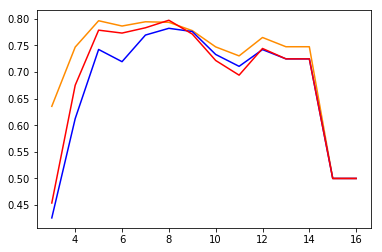

In [59]:
plt.plot(result_metrics['metr1'],color='darkorange',label='metr1')
plt.plot(result_metrics['metr2'],color='blue',label='metr2')
plt.plot(result_metrics['metr3'],color='red',label='metr3')
plt.show()

In [8]:
#Результаты в итоговую таблицу excel
writer = pd.ExcelWriter('output.xlsx')
r.to_excel(writer,'Sheet1')
writer.save()

NameError: name 'r' is not defined

## AUC-ROC кривая

In [151]:
output=pd.read_excel('output_with_d1_0.1_and_rand_vals_8_round3.xlsx')

Нормализуем признаки

In [152]:
for col in range(11,14):
    x=output.iloc[:,col].copy()
    output.iloc[:,col]=(x-min(x))/(max(x)-min(x))

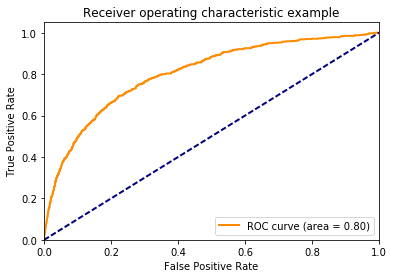

In [153]:
fpr, tpr, thresholds = roc_curve(y_score=output.metr3,y_true=output.SeriousDlqin2yrs)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [156]:
roc_auc_score(y_score=output.loc[X_train.index.values].metr3,y_true=output.loc[X_train.index.values].SeriousDlqin2yrs)

0.79980107686768664

# Пост обработка классификаторами

### Без WoE

In [411]:
output=pd.read_excel('output_with_d1_0.1_and_rand_vals_9_round_5_without_woe.xlsx')

In [412]:
X_train, X_test, y_train, y_test = train_test_split(output[output.columns.difference(['SeriousDlqin2yrs'])], output.iloc[:,-4],test_size=0.33, random_state=241)

In [413]:
def cvDictGen_base(functions, scr, X_train=X_train.iloc[:,:10], y_train=y_train,X_test=X_test.iloc[:,:10], y_test=y_test, cv=3, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        func.fit(X_train,y_train)
        roc_score_test=roc_auc_score(y_score=func.predict_proba(X_test)[:,1],y_true=y_test)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std(),roc_score_test]
    return cvDict

In [414]:
def cvDictGen(functions, scr, X_train=X_train.iloc[:,-3:], y_train=y_train,X_test=X_test.iloc[:,-3:], y_test=y_test, cv=3, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        func.fit(X_train,y_train)
        roc_score_test=roc_auc_score(y_score=func.predict_proba(X_test)[:,1],y_true=y_test)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std(),roc_score_test]
    return cvDict
def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['Кросс-валидация на обучающей выборке(20т. строк): {:0.3f}'.format((cvDict[key][0])),
                                     'Отклонение: {:0.3f}'.format((cvDict[key][1])),
                                     'Результат модели на тестовой выборке(10т. строк): {:0.3f}'.format((cvDict[key][2]))]
    return cvDictNormalized

In [415]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)
glmMod = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=241, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0,random_state=241)
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=241, max_features=None, verbose=0)
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=241, verbose=0)

In [416]:
cvD1 = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc')

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


[LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Лучшие результаты у логистической регрессии и градиентного бустинга!

In [417]:
cvDictNormalize(cvD1)

{'AdaBoostClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.746',
  'Отклонение: 0.008',
  'Результат модели на тестовой выборке(10т. строк): 0.773'],
 'GradientBoostingClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.751',
  'Отклонение: 0.012',
  'Результат модели на тестовой выборке(10т. строк): 0.780'],
 'KNeighborsClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.642',
  'Отклонение: 0.009',
  'Результат модели на тестовой выборке(10т. строк): 0.669'],
 'LogisticRegression': ['Кросс-валидация на обучающей выборке(20т. строк): 0.723',
  'Отклонение: 0.011',
  'Результат модели на тестовой выборке(10т. строк): 0.755'],
 'RandomForestClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.642',
  'Отклонение: 0.007',
  'Результат модели на тестовой выборке(10т. строк): 0.684']}

Проведем оптимизацию параметров

In [418]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train.iloc[:,-3:], y_train)
# print(gridSearchGB.best_params_, gridSearchGB.best_score_)
bestGbModFitted = gridSearchGB.best_estimator_
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(glmMod, param_grid, scoring='roc_auc')
clf.fit(X_train.iloc[:,-3:],y_train)
bestGlModFitted=clf.best_estimator_
cvDictHPO = cvDictGen(functions=[bestGbModFitted, bestGlModFitted], scr='roc_auc')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] loss=deviance, max_depth=5, n_estimators=69 .....................
[CV] ............ loss=deviance, max_depth=5, n_estimators=69 -   0.1s
[CV] loss=deviance, max_depth=5, n_estimators=69 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............ loss=deviance, max_depth=5, n_estimators=69 -   0.1s
[CV] loss=deviance, max_depth=5, n_estimators=69 .....................
[CV] ............ loss=deviance, max_depth=5, n_estimators=69 -   0.1s
[CV] loss=deviance, max_depth=2, n_estimators=258 ....................
[CV] ........... loss=deviance, max_depth=2, n_estimators=258 -   0.2s
[CV] loss=deviance, max_depth=2, n_estimators=258 ....................
[CV] ........... loss=deviance, max_depth=2, n_estimators=258 -   0.2s
[CV] loss=deviance, max_depth=2, n_estimators=258 ....................
[CV] ........... loss=deviance, max_depth=2, n_estimators=258 -   0.3s
[CV] loss=exponential, max_depth=2, n_estimators=231 .................
[CV] ........ loss=exponential, max_depth=2, n_estimators=231 -   0.1s
[CV] loss=exponential, max_depth=2, n_estimators=231 .................
[CV] ........ loss=exponential, max_depth=2, n_estimators=231 -   0.1s
[CV] loss=exponential, max_depth=2, n_estimators=231 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   20.7s finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished


[LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


Виден незначительный прирост на градиентном бустинге и логистической регрессии:

In [419]:
cvDictNormalize(cvDictHPO)

{'GradientBoostingClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.772',
  'Отклонение: 0.007',
  'Результат модели на тестовой выборке(10т. строк): 0.788'],
 'LogisticRegression': ['Кросс-валидация на обучающей выборке(20т. строк): 0.723',
  'Отклонение: 0.011',
  'Результат модели на тестовой выборке(10т. строк): 0.755']}

Исходный roc_auc при алгоритме узорных структур на обучающей выборке:

In [420]:
roc_auc_score(y_score=output.loc[X_train.index.values].metr1,y_true=output.loc[X_train.index.values].SeriousDlqin2yrs)

0.74967340565762741

На тестовой выборке

In [421]:
roc_auc_score(y_score=output.loc[X_test.index.values].metr1,y_true=output.loc[X_test.index.values].SeriousDlqin2yrs)

0.76294349905461012

базовые алгоритмы классификации

In [422]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0)

In [423]:
cvD2 = cvDictGen_base(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc')

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


[LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


In [424]:
cvDictNormalize(cvD2)

{'AdaBoostClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.798',
  'Отклонение: 0.015',
  'Результат модели на тестовой выборке(10т. строк): 0.819'],
 'GradientBoostingClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.826',
  'Отклонение: 0.004',
  'Результат модели на тестовой выборке(10т. строк): 0.851'],
 'KNeighborsClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.540',
  'Отклонение: 0.020',
  'Результат модели на тестовой выборке(10т. строк): 0.535'],
 'LogisticRegression': ['Кросс-валидация на обучающей выборке(20т. строк): 0.703',
  'Отклонение: 0.030',
  'Результат модели на тестовой выборке(10т. строк): 0.671'],
 'RandomForestClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.744',
  'Отклонение: 0.011',
  'Результат модели на тестовой выборке(10т. строк): 0.794']}

### С WoE

In [425]:
output2=pd.read_excel('output_with_d1_0.1_and_rand_vals_9_round_5_with_woe.xlsx')

In [426]:
X_train, X_test, y_train, y_test = train_test_split(output2[output2.columns.difference(['SeriousDlqin2yrs'])], output2.iloc[:,-4],test_size=0.33, random_state=241)

In [427]:
def cvDictGen_base(functions, scr, X_train=X_train.iloc[:,:10], y_train=y_train,X_test=X_test.iloc[:,:10], y_test=y_test, cv=3, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        func.fit(X_train,y_train)
        roc_score_test=roc_auc_score(y_score=func.predict_proba(X_test)[:,1],y_true=y_test)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std(),roc_score_test]
    return cvDict

In [428]:
def cvDictGen(functions, scr, X_train=X_train.iloc[:,-3:], y_train=y_train,X_test=X_test.iloc[:,-3:], y_test=y_test, cv=3, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        func.fit(X_train,y_train)
        roc_score_test=roc_auc_score(y_score=func.predict_proba(X_test)[:,1],y_true=y_test)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std(),roc_score_test]
    return cvDict
def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['Кросс-валидация на обучающей выборке(20т. строк): {:0.3f}'.format((cvDict[key][0])),
                                     'Отклонение: {:0.3f}'.format((cvDict[key][1])),
                                     'Результат модели на тестовой выборке(10т. строк): {:0.3f}'.format((cvDict[key][2]))]
    return cvDictNormalized

In [429]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)
glmMod = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=241, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0,random_state=241)
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=241, max_features=None, verbose=0)
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=241, verbose=0)

In [430]:
cvD3 = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc')

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


[LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


Теперь хорошие результаты начал демонстрировать еще и случайный лес

In [431]:
cvDictNormalize(cvD3)

{'AdaBoostClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.758',
  'Отклонение: 0.012',
  'Результат модели на тестовой выборке(10т. строк): 0.781'],
 'GradientBoostingClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.749',
  'Отклонение: 0.019',
  'Результат модели на тестовой выборке(10т. строк): 0.782'],
 'KNeighborsClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.723',
  'Отклонение: 0.012',
  'Результат модели на тестовой выборке(10т. строк): 0.513'],
 'LogisticRegression': ['Кросс-валидация на обучающей выборке(20т. строк): 0.732',
  'Отклонение: 0.010',
  'Результат модели на тестовой выборке(10т. строк): 0.745'],
 'RandomForestClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.743',
  'Отклонение: 0.020',
  'Результат модели на тестовой выборке(10т. строк): 0.782']}

Проведем оптимизацию параметров

In [432]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train.iloc[:,-3:], y_train)
# print(gridSearchGB.best_params_, gridSearchGB.best_score_)
bestGbModFitted = gridSearchGB.best_estimator_
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(glmMod, param_grid, scoring='roc_auc')
clf.fit(X_train.iloc[:,-3:],y_train)
bestGlModFitted=clf.best_estimator_
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(rfMod, param_grid=param_grid,scoring='roc_auc')
grid_search.fit(X_train.iloc[:,-3:],y_train)
bestrfModFitted=grid_search.best_estimator_
cvDictHPO2 = cvDictGen(functions=[bestGbModFitted, bestGlModFitted,bestrfModFitted], scr='roc_auc')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] loss=deviance, max_depth=8, n_estimators=211 ....................
[CV] ........... loss=deviance, max_depth=8, n_estimators=211 -   0.3s
[CV] loss=deviance, max_depth=8, n_estimators=211 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ........... loss=deviance, max_depth=8, n_estimators=211 -   0.4s
[CV] loss=deviance, max_depth=8, n_estimators=211 ....................
[CV] ........... loss=deviance, max_depth=8, n_estimators=211 -   0.3s
[CV] loss=deviance, max_depth=7, n_estimators=61 .....................
[CV] ............ loss=deviance, max_depth=7, n_estimators=61 -   0.0s
[CV] loss=deviance, max_depth=7, n_estimators=61 .....................
[CV] ............ loss=deviance, max_depth=7, n_estimators=61 -   0.0s
[CV] loss=deviance, max_depth=7, n_estimators=61 .....................
[CV] ............ loss=deviance, max_depth=7, n_estimators=61 -   0.0s
[CV] loss=exponential, max_depth=4, n_estimators=380 .................
[CV] ........ loss=exponential, max_depth=4, n_estimators=380 -   0.4s
[CV] loss=exponential, max_depth=4, n_estimators=380 .................
[CV] ........ loss=exponential, max_depth=4, n_estimators=380 -   0.4s
[CV] loss=exponential, max_depth=4, n_estimators=380 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    9.4s finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


[LibLinear][LibLinear][LibLinear][LibLinear]

Прирост примерно на 0.02

In [433]:
cvDictNormalize(cvDictHPO2)

{'GradientBoostingClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.760',
  'Отклонение: 0.007',
  'Результат модели на тестовой выборке(10т. строк): 0.769'],
 'LogisticRegression': ['Кросс-валидация на обучающей выборке(20т. строк): 0.732',
  'Отклонение: 0.010',
  'Результат модели на тестовой выборке(10т. строк): 0.745'],
 'RandomForestClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.759',
  'Отклонение: 0.017',
  'Результат модели на тестовой выборке(10т. строк): 0.779']}

Исходный roc_auc при алгоритме узорных структур c WoE на обучающей выборке:

In [434]:
roc_auc_score(y_score=output.loc[X_train.index.values].metr1,y_true=output.loc[X_train.index.values].SeriousDlqin2yrs)

0.74967340565762741

На тестовой выборке

In [435]:
roc_auc_score(y_score=output.loc[X_test.index.values].metr1,y_true=output.loc[X_test.index.values].SeriousDlqin2yrs)

0.76294349905461012

базовые алгоритмы классификации с WoE

In [436]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0)

In [437]:
cvD4 = cvDictGen_base(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc')

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


[LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


In [438]:
cvDictNormalize(cvD4)

{'AdaBoostClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.835',
  'Отклонение: 0.005',
  'Результат модели на тестовой выборке(10т. строк): 0.862'],
 'GradientBoostingClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.823',
  'Отклонение: 0.008',
  'Результат модели на тестовой выборке(10т. строк): 0.865'],
 'KNeighborsClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.710',
  'Отклонение: 0.008',
  'Результат модели на тестовой выборке(10т. строк): 0.757'],
 'LogisticRegression': ['Кросс-валидация на обучающей выборке(20т. строк): 0.841',
  'Отклонение: 0.007',
  'Результат модели на тестовой выборке(10т. строк): 0.863'],
 'RandomForestClassifier': ['Кросс-валидация на обучающей выборке(20т. строк): 0.734',
  'Отклонение: 0.011',
  'Результат модели на тестовой выборке(10т. строк): 0.767']}

In [439]:
res_overall2=pd.DataFrame(columns=['pat_struct','classic_kneigh','classic_logr','classic_ada','classic_gb','classic_rf','pat_kneigh','pat_logr','pat_ada','pat_gb','pat_rf'], index=['with_WoE','without_WoE'])

In [440]:
res_overall2.loc['with_WoE','pat_struct']=roc_auc_score(y_score=output2.loc[X_test.index.values].metr1,y_true=output2.loc[X_test.index.values].SeriousDlqin2yrs)
res_overall2.loc['without_WoE','pat_struct']=roc_auc_score(y_score=output.loc[X_test.index.values].metr1,y_true=output.loc[X_test.index.values].SeriousDlqin2yrs)
i=1
for key in cvD2.keys():
#     print (key)
    res_overall2.iloc[0,i]=cvD4[key][2]
    res_overall2.iloc[1,i]=cvD2[key][2]
    res_overall2.iloc[0,5+i]=cvD3[key][2]
    res_overall2.iloc[1,5+i]=cvD1[key][2]
    i+=1

In [441]:
res_overall

,pat_struct,classic_kneigh,classic_logr,classic_ada,classic_gb,classic_rf,pat_kneigh,pat_logr,pat_ada,pat_gb,pat_rf
with_WoE,0.78392,0.756867,0.863111,0.861937,0.865125,0.772045,0.512928,0.793117,0.812721,0.80576,0.780685
without_WoE,0.803396,0.534996,0.674328,0.819333,0.85083,0.778043,0.694197,0.814352,0.79913,0.796813,0.70093


In [442]:
writer = pd.ExcelWriter('resoverall_d1_0.1_and_rand_vals_9.xlsx')
res_overall2.to_excel(writer,'Sheet1')
writer.save()
res_overall2

,pat_struct,classic_kneigh,classic_logr,classic_ada,classic_gb,classic_rf,pat_kneigh,pat_logr,pat_ada,pat_gb,pat_rf
with_WoE,0.748807,0.756867,0.863112,0.861937,0.865125,0.766656,0.512653,0.745078,0.780653,0.782031,0.782023
without_WoE,0.762943,0.534996,0.671073,0.819333,0.851156,0.793599,0.668579,0.755481,0.772853,0.780392,0.684365
